Housing Prices: Advanced Regression Techniques

Jazmin Mena

Introduction to Machine Learning Applications 

Fall 2020


In [5]:
#Importing Packages
import pandas as pd
import numpy as np
from scipy import stats, integrate
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from string import ascii_letters
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV


from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


from numpy import mean
from numpy import std



In [6]:
#Import train + test data
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

#A glimpse at the data
train.head() #Has SalePrice Column
test.head() #Has no SalePrice Column

#Checking to see data types 
train.info()

#Shape
train.shape
test.shape




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1459, 80)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Feature Selection

In [9]:
#Selecting Out Features Based on Interview with a real estate agent
new_train = train[[ "Neighborhood","GarageCars", "YearBuilt","YrSold", "GrLivArea", "TotalBsmtSF", "BedroomAbvGr", "KitchenAbvGr","TotRmsAbvGrd" ,"LotFrontage", "LotArea","SalePrice"]]
new_train= pd.DataFrame(new_train)
new_test = test[["Neighborhood","GarageCars","YearBuilt","YrSold", "GrLivArea", "TotalBsmtSF", "BedroomAbvGr", "KitchenAbvGr","TotRmsAbvGrd" ,"LotFrontage", "LotArea"]]
#Selected features data types
new_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1460 non-null   object 
 1   GarageCars    1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YrSold        1460 non-null   int64  
 4   GrLivArea     1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   BedroomAbvGr  1460 non-null   int64  
 7   KitchenAbvGr  1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   LotFrontage   1201 non-null   float64
 10  LotArea       1460 non-null   int64  
 11  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 137.0+ KB


In order to proceed with selected features, I will check for any missing values in the train and test data. If missing values are found, then I will process feautures with mean imputation to continue analysis.  

In [10]:
#Now I will check if there are any missing values
def get_missing(new_train):
    missing = new_train.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'variable',0:'count'})
    missing = missing[missing['count']>0]
    missing['missing_ratio'] = np.round(missing['count']/len(train),4)
    return missing
get_missing(new_train)

,variable,count,missing_ratio
0,LotFrontage,259,0.1774


In [11]:
#Checking data type
new_train['LotFrontage'].dtypes

dtype('float64')

In [12]:
#Mean Imputation
new_train['LotFrontage'] = new_train['LotFrontage'].fillna(new_train['LotFrontage'].mean())


In [13]:
new_train['LotFrontage'].isnull().sum()

0

In [14]:
new_train.info()
#Now there are no more null values in the train data with selected features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  1460 non-null   object 
 1   GarageCars    1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YrSold        1460 non-null   int64  
 4   GrLivArea     1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   BedroomAbvGr  1460 non-null   int64  
 7   KitchenAbvGr  1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   LotFrontage   1460 non-null   float64
 10  LotArea       1460 non-null   int64  
 11  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 137.0+ KB


In [15]:
new_train.describe()

,GarageCars,YearBuilt,YrSold,GrLivArea,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,LotFrontage,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.767123,1971.267808,2007.815753,1515.463699,1057.429452,2.866438,1.046575,6.517808,70.049958,10516.828082,180921.195890
std,0.747315,30.202904,1.328095,525.480383,438.705324,0.815778,0.220338,1.625393,22.024023,9981.264932,79442.502883
min,0.000000,1872.000000,2006.000000,334.000000,0.000000,0.000000,0.000000,2.000000,21.000000,1300.000000,34900.000000
25%,1.000000,1954.000000,2007.000000,1129.500000,795.750000,2.000000,1.000000,5.000000,60.000000,7553.500000,129975.000000
50%,2.000000,1973.000000,2008.000000,1464.000000,991.500000,3.000000,1.000000,6.000000,70.049958,9478.500000,163000.000000
75%,2.000000,2000.000000,2009.000000,1776.750000,1298.250000,3.000000,1.000000,7.000000,79.000000,11601.500000,214000.000000
max,4.000000,2010.000000,2010.000000,5642.000000,6110.000000,8.000000,3.000000,14.000000,313.000000,215245.000000,755000.000000


In [16]:
def get_missing(new_test):
    missing = new_test.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'variable',0:'count'})
    missing = missing[missing['count']>0]
    missing['missing_ratio'] = np.round(missing['count']/len(test),4)
    return missing
get_missing(new_test)

,variable,count,missing_ratio
0,LotFrontage,227,0.1556
1,TotalBsmtSF,1,0.0007
2,GarageCars,1,0.0007


In [ ]:
#Checking data type
print(new_test['LotFrontage'].dtypes)
print(new_test['TotalBsmtSF'].dtypes)
print(new_test['GarageCars'].dtypes)

In [18]:
new_test['LotFrontage'] = new_test['LotFrontage'].fillna(new_test['LotFrontage'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
new_test['LotFrontage'].isnull().sum()

0

In [21]:
new_test['TotalBsmtSF'] = new_test['TotalBsmtSF'].fillna(new_test['TotalBsmtSF'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
new_test['TotalBsmtSF'].isnull().sum()

0

In [23]:
new_test['GarageCars'] = new_test['GarageCars'].fillna(new_test['GarageCars'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
new_test['GarageCars'].isnull().sum()

0

In [25]:
def get_missing(new_test):
    missing = new_test.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'variable',0:'count'})
    missing = missing[missing['count']>0]
    missing['missing_ratio'] = np.round(missing['count']/len(test),4)
    return missing
get_missing(new_test)

,variable,count,missing_ratio


Exploratory Data Analysis

I will continue with the build stage of the end to end machine learning analysis and create visuals with selected features. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.869671642780304, 3.206247534576162e-33)


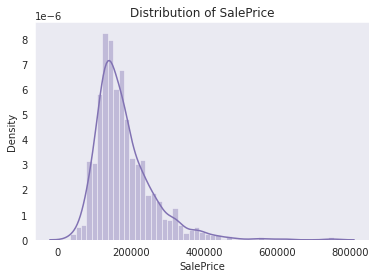

In [26]:
#Check to see if SalesPrice is Normally distributed
sns.set_style("dark")
sns.set_color_codes()
sns.color_palette(palette= "bright")
sns.distplot(new_train["SalePrice"], color= "m")
plt.title("Distribution of SalePrice")
print (stats.shapiro(new_train.SalePrice)) #Null hypothesis is rejected and data is confirmed to be non-normal

Text(0.5, 1.0, 'Boxplot of Sale Price')

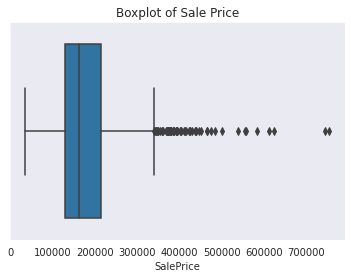

In [27]:

sns.boxplot(x=new_train['SalePrice'])
plt.title("Boxplot of Sale Price")

We will remove outliers from the SalePrice column


In [28]:
Q1 = new_train['SalePrice'].quantile(0.25)
Q3 = new_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
outliers = new_train.loc[((new_train['SalePrice'] < lowqe_bound) |(new_train['SalePrice'] > upper_bound)), 'SalePrice']
print(outliers)
#outliers = new_train.loc[(new_train['SalePrice'] > (Q3 + 1.75 * IQR)) | (train_data['TotalBsmtSF'] < (Q1 - 1.75 * IQR)), 'TotalBsmtSF']

new_train.drop(new_train.loc[(new_train['SalePrice'] < lowqe_bound) |(new_train['SalePrice'] > upper_bound)].index, inplace=True)

new_train.shape



11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64


(1399, 12)

In [29]:
new_train.shape

(1399, 12)

(0.962480366230011, 1.53821483074353e-18)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


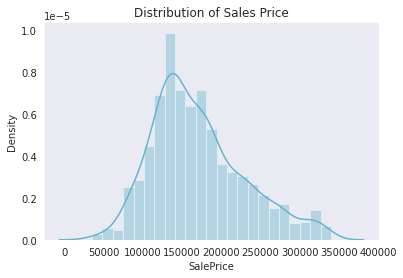

In [30]:
#New Distribution of Sale Price without outliers
sns.set_style("dark")
sns.set_color_codes()
sns.color_palette(palette= "bright")
sns.distplot(new_train["SalePrice"], color= "c")
plt.title("Distribution of Sales Price")
print (stats.shapiro(new_train.SalePrice))


Text(0.5, 1.0, '')

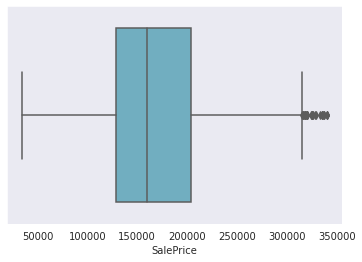

In [31]:
sns.boxplot(x=new_train['SalePrice'], color = "c")
plt.title("")


Text(0.5, 1.0, 'Correlation Matrix of Selected Features')

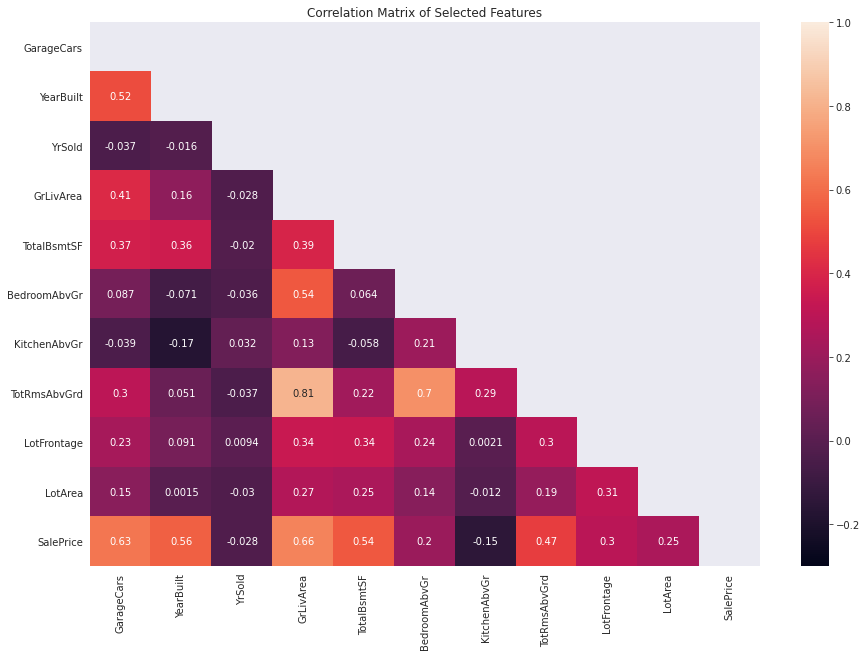

In [32]:
# Compute the correlation matrix
corr = new_train.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, vmax = 1, vmin= -.3 ,annot=True, mask=matrix)
plt.title("Correlation Matrix of Selected Features")

Text(0.5, 1.0, 'Number of Houses Sold each Year')

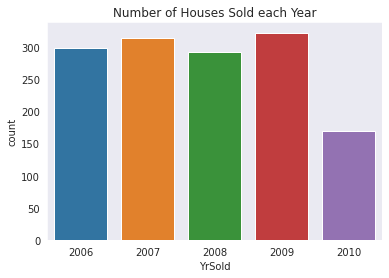

In [33]:
#shows pretty equsl distrubution of houses sold per year
YrSoldVisual = sns.countplot(x = 'YrSold', data = new_train)
plt.savefig('YrSoldVisual')
plt.title("Number of Houses Sold each Year")


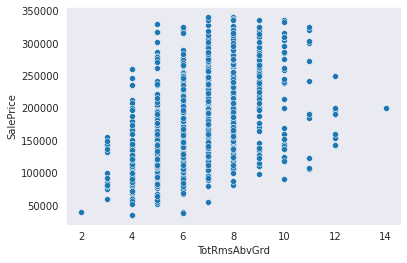

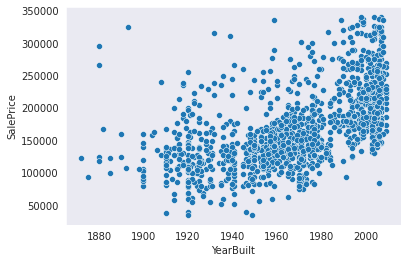

In [35]:
#Yearbuild and sale price scatterplot
Yrbuillt = sns.scatterplot(x  = "YearBuilt", y= "SalePrice", data = new_train)

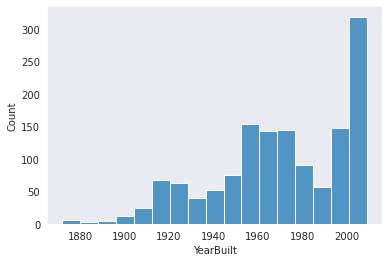

In [36]:
#Distribution of houses by year built

histyrbuilt = sns.histplot(x = "YearBuilt",  data = new_train)

Text(0.5, 1.0, 'Histogram of Kitchens in a home')

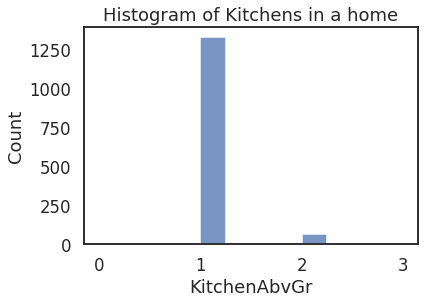

In [62]:
#Checking distribution of  nnumber of Kitchens
histkitchens= sns.histplot(x = "KitchenAbvGr", data = new_train) #Shows most homes only have one kitchen which is why the correlation for this independant variable is so low
plt.title("Histogram of Kitchens in a home")

Text(0.5, 1.0, 'Garage Cars and Price')

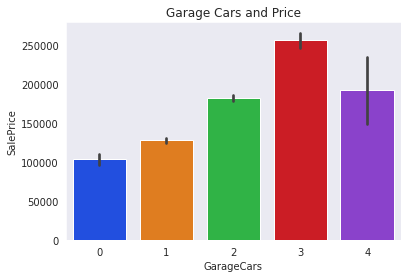

In [39]:
#Number of garage cars and sale price
CarsVisual = sns.barplot(data = new_train, x = 'GarageCars', y ='SalePrice', palette="bright")

plt.title("Garage Cars and Price")

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]), <a list of 8 Text major ticklabel objects>)

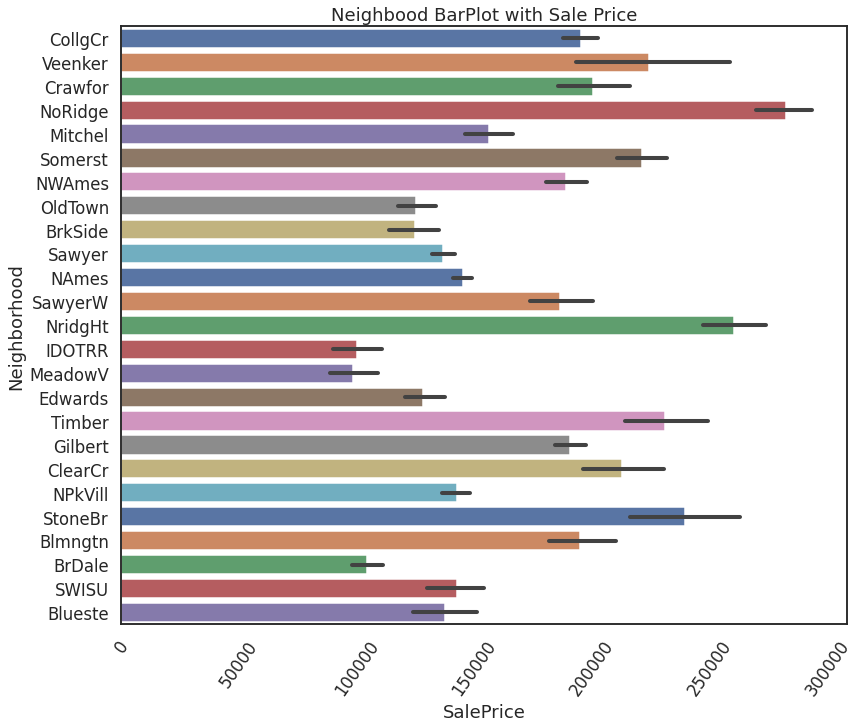

In [40]:
#Neighborhood and Sale Price barplot
sns.set_theme(style="white", context="talk")
plt.subplots(1, 1, figsize=(13, 11))
NeighborhoodVisual = sns.barplot(x="SalePrice", y="Neighborhood", palette="deep",  data = new_train)
plt.title("Neighbood BarPlot with Sale Price")

plt.xticks(rotation=55)

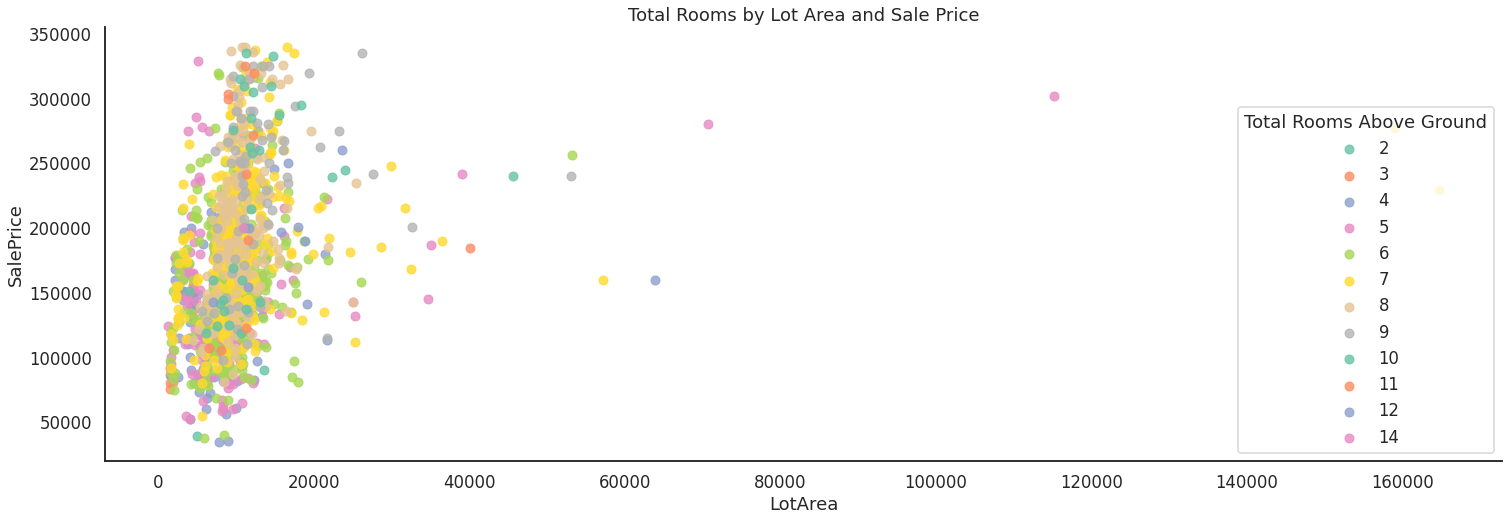

In [41]:
#Total Rooms by Lot Area and Sale Price
LotAreaVisual =sns.lmplot( x="LotArea", y="SalePrice", data=new_train, fit_reg=False, hue="TotRmsAbvGrd", height = 7, aspect= 3, legend=False, palette = "Set2", )
plt.title("Total Rooms by Lot Area and Sale Price")

#Move the legend to an empty part of the plot
plt.legend(loc='lower right', facecolor = "inherit", title = "Total Rooms Above Ground")

#sns.plt.show()


The data here has removed outliers from the sales price column. Only one column has missing values, therefore I used mean imputation to fill in for those missing values. 

Now, it is time to select the models for data. 

Model 1


The Neighborhood column is a categorical variable so we will need to recode this in order to implement the model

Generate Dummy Variables

In [42]:
y = new_train["SalePrice"]
#y = new_test["SalePrice"]

new_train_1 = new_train.copy()
new_train_1 = new_train_1.drop(columns = ['SalePrice'])
new_train_1 = pd.get_dummies(new_train_1, columns=['Neighborhood'], drop_first=True)

print(new_train_1.head())


new_test_1 = new_test.copy
new_test_1 = pd.get_dummies(new_test, columns=['Neighborhood'], drop_first=True)

print(new_test_1.head())

   GarageCars  YearBuilt  ...  Neighborhood_Timber  Neighborhood_Veenker
0           2       2003  ...                    0                     0
1           2       1976  ...                    0                     1
2           2       2001  ...                    0                     0
3           3       1915  ...                    0                     0
4           3       2000  ...                    0                     0

[5 rows x 34 columns]
   GarageCars  YearBuilt  ...  Neighborhood_Timber  Neighborhood_Veenker
0         1.0       1961  ...                    0                     0
1         1.0       1958  ...                    0                     0
2         2.0       1997  ...                    0                     0
3         2.0       1998  ...                    0                     0
4         2.0       1992  ...                    0                     0

[5 rows x 34 columns]


## Creating the Model
I will now start to create my first model for the housing data set using Linear  Regression.

In [43]:
#Linear Regression

train_x_R, test_x_R, train_y_R,test_y_R = train_test_split(new_train_1, y, train_size = 0.80, test_size = 0.2, random_state= 100)
print(train_y_R)
#create a model and fit
lin_reg = LinearRegression()

#Train Model (note to self : fit only on train data)
lin_reg.fit(train_x_R, train_y_R)

#coeff_parameter = pd.DataFrame(lin_reg.coef_,new_train_1.columns,columns=['Coefficient'])
#print(coeff_parameter)

#Predict Response for Train
y_train_predict_LR = lin_reg.predict(train_x_R)
#print(y_train_predict_LR)
#Predict Response for Test
y_test_predict_LR = lin_reg.predict(test_x_R)
#print(y_test_predict_clus)

LR_r2_train = metrics.r2_score(train_y_R,y_train_predict_LR)
LR_r2_test = metrics.r2_score(test_y_R, y_test_predict_LR)
print(LR_r2_train)
print(LR_r2_test)



1037    287000
947     270000
277     141000
141     260000
829     147400
         ...  
846     213000
55      180500
367     165000
82      245000
836     153500
Name: SalePrice, Length: 1119, dtype: int64
0.7867828077563537
0.8087996212915857


In [44]:
#RMSE for train data
rmseLR_train = sqrt(mean_squared_error(train_y_R, y_train_predict_LR))
print(rmseLR_train)
#RMSE for test daya
rmseLR_test = sqrt(mean_squared_error(test_y_R, y_test_predict_LR))
print(rmseLR_test)


27086.022380945527
26699.22144280729


In [45]:
#Printing Shapes to make sure they are correct
print(test.shape)
print(new_test.shape)
print(new_test_1.shape)
print(new_train_1.shape)

(1459, 80)
(1459, 11)
(1459, 34)
(1399, 34)


The code below create the first submission. It is commented out since the Id variable is not included in the models and was added in at the end to be able to score the model on Kaggle. The submission lines will only run when the Id column is included in the dataframes for the test and train data

In [46]:
#test5 = lin_reg.predict(new_test_1)
#print(test.shape)

In [47]:
#Creating the first  submission
#submission1 = pd.DataFrame({'Id':new_test_1['Id'],'SalePrice':test5})
#submission1.head()
#Visualize the first 5 rows
#submission1.head()


In [48]:
#Convert DataFrame to a csv file that can be uploaded
#filename = 'HousingPredictionLinearRegression.csv'

#submission1.to_csv(filename,index=False)


Now,I  will continue with another model in order to try and approve our RMSE score and R2 values.

Random Forest Regressor Model.

In [49]:

#Create model and fit
rf = RandomForestRegressor()
#Train Model and fit only on train
rf.fit(train_x_R, train_y_R)

#Predict Response for Train
y2_train_predict_RF = rf.predict(train_x_R)
#Predict Response for Test
y2_test_predict_RF = rf.predict(test_x_R)

#R2 score for train and test
model2_r2_train = metrics.r2_score(train_y_R,y2_train_predict_RF)
model2_r2_test = metrics.r2_score(test_y_R, y2_test_predict_RF)

print(model2_r2_train)
print(model2_r2_test)

#RMSE score for train and test
rmseRF_train = sqrt(mean_squared_error(train_y_R, y2_train_predict_RF))
print(rmseRF_train)
rmseRF_test = sqrt(mean_squared_error(test_y_R, y2_test_predict_RF))
print(rmseRF_test)


0.9741392432441336
0.8273797732113399
9433.10649971693
25368.808185157195


The code below is for the submission of the random forrest model.

In [50]:
#test3 = rf.predict(new_test_1)

In [51]:

#print(y_test_predict_clus)
#y_test_predict_clus.shape
#y_train_predict_clus.shape
#submission2 = pd.DataFrame({'Id':new_test_1['Id'],'SalePrice':test3})
#submission2.head()



In [52]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
#filename = 'HousingPredictionRandomForrestRegression.csv'

#submission2.to_csv(filename,index=False)


Model 3 wil  be Ridge Regression. In order to find the correct parameters for alpha, I  had to standardize the features, create ridge with possible alpha values and then fit the  Ridge Regression

In [53]:
# Standarize features
y = new_train['SalePrice']
X = new_train_1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [54]:
#Finding Candidate alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

In [55]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y)

In [56]:
# View alpha
model_cv.alpha_

10.0

I will proceed to  model the Ridge  Regression with an alpha value of 10

In [57]:
#Create Model
regr_cv1 = Ridge(alpha = 10)

#Train Model
regr_cv1.fit(train_x_R, train_y_R)

#Predict Response for Train
y_train_predict_ridge = regr_cv1.predict(train_x_R)
#print(y_train_predict_lasso)       
#Predict Response for Test
y_test_predict_ridge = regr_cv1.predict(test_x_R)
#print(y_test_predict_clus)

RidgeCV_r2_train = metrics.r2_score(train_y_R,y_train_predict_ridge)
RidgeCV_r2_test = metrics.r2_score(test_y_R, y_test_predict_ridge)
print(RidgeCV_r2_train)
print(RidgeCV_r2_test)



0.7769322911463592
0.8157239183461795


In [58]:
#RMSE for train data
rmseRidge_train = sqrt(mean_squared_error(train_y_R, y_train_predict_ridge))
print(rmseRidge_train)
#RMSE for test data
rmseRidge_test = sqrt(mean_squared_error(test_y_R, y_test_predict_ridge))
print(rmseRidge_test)

27704.63777126967
26211.308854341398


The code below made the third Kaggle submission with Ridge Regression

In [59]:
#Creating the third  submission
#test6 = regr_cv1.predict(new_test_1)
#submission3 = pd.DataFrame({'Id':new_test_1['Id'],'SalePrice':test6})
#submission3.head()

#Visualize the first 5 rows
#submission3.head()

In [60]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
#filename = 'HousingPredictionRidgeRegression.csv'

#submission3.to_csv(filename,index=False)


I decided to further tune the model and use the four best features out of the eleven chosen using SelectKBest to see if I could improve the performance of the first Ridge regression.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 4 best features

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(new_train_1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(new_train_1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 4 best features

In [ ]:
print(new_test)

Now, using SelectKBest on my selected features, I will use the top four in the next Ridge Regression Model and see if this gives more accurate results. I will keep the value of 10 for alpha

In [ ]:
new_train_2 = new_train_1[["GarageCars", "GrLivArea", "TotalBsmtSF","LotFrontage"]]


train_x_R2, test_x_R2, train_y_R2,test_y_R2 = train_test_split(new_train_2, y, train_size = 0.80, test_size = 0.2, random_state= 100)

regr_cv1 = Ridge(alpha = 10)

#Train Model
regr_cv1.fit(train_x_R2, train_y_R2)

#Predict Response for Train
y_train_predict_ridge = regr_cv1.predict(train_x_R2)
#print(y_train_predict_lasso)       
#Predict Response for Test
y_test_predict_ridge = regr_cv1.predict(test_x_R2)
#print(y_test_predict_clus)

#R2 for train data
RidgeCV_r2_train = metrics.r2_score(train_y_R2,y_train_predict_ridge)

#R2 for test data
RidgeCV_r2_test = metrics.r2_score(test_y_R2, y_test_predict_ridge)
print(RidgeCV_r2_train)
print(RidgeCV_r2_test)



In [ ]:
#RMSE score for train data
rmseRidge_train = sqrt(mean_squared_error(train_y_R2, y_train_predict_ridge))
print(rmseRidge_train)
#RMSE score for test data
rmseRidge_test = sqrt(mean_squared_error(test_y_R2, y_test_predict_ridge))
print(rmseRidge_test)

There have been no improvements wit the fourth model. The RMSE score for the test data was 33538 which was way higher than the original ridge regression that used all of the eleven features. Using all eleven features, the RMSE score for the test data was 26181.